<a href="https://colab.research.google.com/github/AlexBYork/TitanicDataProject/blob/main/titanic_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[link text](https://)

Loading Libraries and Data for our training data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
answer_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')


# Data Cleaning

The first thing we want to consider is if any of these columns are simply not going to give us any information.
Passenger ID is essentially just our index, Name is ... unlikely to help us with anything.
Though we could consider some outside ideas ... such as does length of name or the presence of a title


I.E. Mr. Miss etc... give us any information.
Similarily the ticket #'s seem completely arbitrary.  
However it may be interesting to consider if longer names or titles within names have predictive power.


First I want to just visualize the data.  My first thought is to throw the entire thing into histograms.
Some of this information will be essentially useless (passenger ID is not going to give us any real information.
But this is a good way we could realize that without knowing ahead of time what the data is.
For an in depth study going deeper into each column of data is probably worth our time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f210d0fdf90>,
      dtype=object)

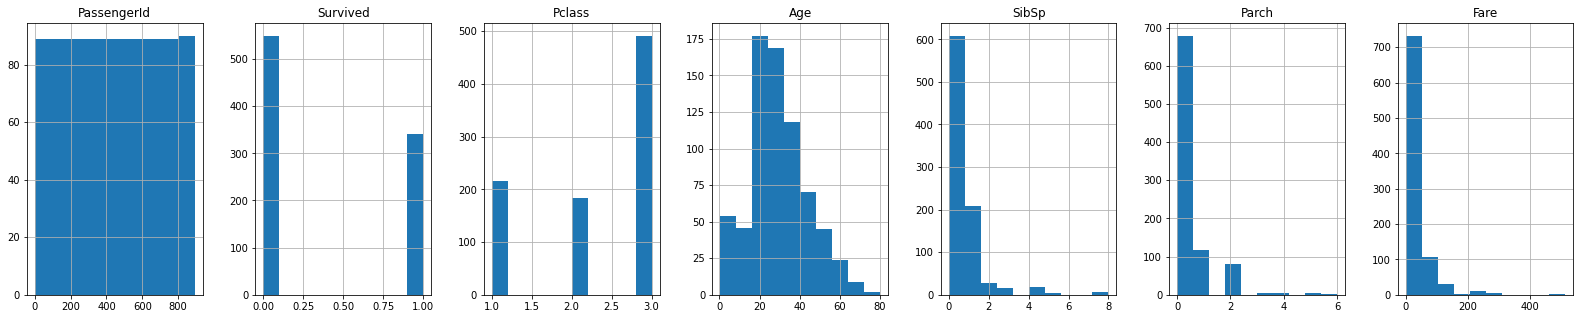

In [ ]:
df.hist(layout=(1,10), figsize = [40,5]) # For a smaller dataframe like this just rolling them all out as a single row works.  

From our visualization we can take a couple of things immediately from this data.

1.   Survival is under 50%
2.   3rd class total is about = to 1st and 2nd
3.   Most comon age was around 20 but a wide spread out to 80
4.   There were more 1st than 2nd class passengers (which is just a little odd)



Cabin Number and letter information seems potentially useful but we will want to seperate them into their own fields.
After that we will remove NaN's from our data- replacing with 0 so we can feed them into numerical data modelling via Sklearn.

In [ ]:
df['Cabin_L'] = df['Cabin'].str.extract(r'(\w)')
df['Cabin_Number'] = df['Cabin'].str.extract(r'(\d+)')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_L,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148


In [ ]:
# Many sklearn modules require no NaN values so we will fill ours with 0's
df['Age']=df['Age'].fillna(0)
df['Fare']=df['Fare'].fillna(0)
df['Cabin_L']=df['Cabin_L'].fillna('Z')
df['Cabin_Number']=df['Cabin_Number'].fillna(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_L,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Z,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S,Z,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148




# Some Setup


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(z):
  print(cm)
  plt.matshow(z)
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True')
  plt.xlabel('Predicted')
  plt.show()
from sklearn.metrics import accuracy_score #Accuracy score is a simple test of our models
from pandas.core.common import random_state

# Some first quick looks
We want to start with any obvious metrics.  Given the famous phrase ("women and children first") it's reasonable to assume Gender might have be a reasonable base model to consider.
What % of people survived versus what % of men and women survived.
If we can find some obvious super good prediction with an ultra simple model.
Further we should judge any model we generate against the simples.
We will consider : predicting based on sex, age, and fare.
An even more simple baseline would be to simply take the average and make that your assumption.  The average person on the titanic (by that meaning a randomly selected person) died, so the simplest reasonable guess would simply be to say that everyone died.  This guess would be correct about 60% of the time.

In [ ]:
# In order to test our model we will split our data into a train and test set.  
# This way we can observe if the model we make using the training set is generalizable.
df_train, df_test = train_test_split(df, test_size=0.3) 

In [ ]:
Total_Survived=df_train["Survived"]
rate_total = sum(Total_Survived/len(Total_Survived))
surviving_women=df_train[df_train.Sex == 'female']["Survived"]
rate_women = sum(surviving_women)/len(surviving_women)
surviving_men=df_train[df_train.Sex=='male']["Survived"]
rate_men = sum(surviving_men)/len(surviving_men)

print("% of people who survived:", round(rate_total*100, 2),"%")
print("% of women who survived:", round(rate_women*100, 2),"%")
print("% of men who survived:", round(rate_men*100, 2), "%")

% of people who survived: 39.0 %
% of women who survived: 74.12 %
% of men who survived: 18.73 %


Based upon this we could make a fairly good baseline rule.
This rule would be simple and understandable.

> {If Male predict survival = 0}{If Female predict survival = 1}

This will be our baseline rule.  If a machine learning model compares unfavorably to this prediction we can assume it would be better to use this simple (and relatively accurate) model to predict outcomes.

In [ ]:
df_baseline=df
sex_to_binary={'male':0, 'female':1}
df_baseline['Prediction']=df_baseline['Sex']
df_baseline.Prediction=[sex_to_binary[i] for i in df_baseline.Prediction]
df_baseline

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_L,Cabin_Number,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Z,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S,Z,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148,0


In [ ]:

baseline_accuracy = accuracy_score(df_baseline['Survived'],df_baseline['Prediction'])
baseline_accuracy

0.7867564534231201

This means our baseline success is 78.7%. By merely predicting that all males will die and all females survive we can get a 78% success rate. I'm not doing a train, test, split because this isn't really a machine learning model. It could be but we really just did it by hand and looked an obvious connection.  It also means we should probably measure any machine learning model we choose to use against this number.  It is probably going to be hard to do a whole lot better.

# Logistic Regression
A logistic regression is a basic machine learning model for classification.  It works similarly to a linear regression. 

In [ ]:
# Let's try a logistic regression model
from sklearn.linear_model import LogisticRegression

y = df_train['Survived']
features_lr = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare","Age"] # Age has to have na's filled before doing this
X_lr = pd.get_dummies(df_train[features_lr])
X_lr_test = pd.get_dummies(df_test[features_lr])
model_lr = LogisticRegression(max_iter=2000 , 
                              random_state=5, 
                              multi_class='multinomial',
                              solver='lbfgs'
                              ) # The random state is just to make sure we are gettin consistent results for the same model.
model_lr.fit(X_lr,y)
predictions_lr = model_lr.predict(X_lr)
predictions_lr_test=model_lr.predict(X_lr_test)
lr_train_output= pd.DataFrame ({'PassengerId':df_train.PassengerId, 'Prediction':predictions_lr, 'Actual':df_train.Survived})
lr_test_output = pd.DataFrame ({'PassengerId':df_test.PassengerId, 'Prediction':predictions_lr_test, 'Actual':df_test.Survived})

# Check accuracy accuracy_score(y_true, y_pred, normalize=False)


In [ ]:
# Check accuracy accuracy_score(y_true, y_pred, normalize=False)
lr_train_accuracy = accuracy_score(lr_train_output['Actual'],lr_train_output['Prediction'])
lr_test_accuracy = accuracy_score(lr_test_output['Actual'],lr_test_output['Prediction'] )
lr_train_accuracy, lr_test_accuracy

(0.7993579454253612, 0.7985074626865671)

[[329  51]
 [ 74 169]]


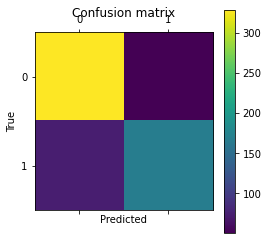

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, lr_train_output['Prediction'])

plot_confusion_matrix(cm)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_lr.columns),pd.DataFrame(np.transpose(model_lr.coef_))], axis = 1)
coefficients

,0,0
0,Pclass,-0.490216
1,SibSp,-0.134380
2,Parch,-0.070419
3,Fare,-0.000465
4,Age,-0.007326
5,Sex_female,0.703044
6,Sex_male,-0.700357
7,Embarked_C,0.068743
8,Embarked_Q,-0.035726
9,Embarked_S,-0.129884


First we checked our accuracy.  Our results were better but not by much (about 1% increase over the simple choose based upon sex model).  A confusion matrix gives us a more visual determination.  
Finally by looking at our actual Coefficients we can see which variables seem to be related to our result.
  

*   We can immediately see that Sex is a strong determinant
*   Pclass ( a stand in for wealth)
*   Finally SibSp which is part of size of family seesm relatvent.

The rest of the coefficients are not particularly strongly related.


# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

features_lda = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare","Age"]
y = df_train['Survived']
X_lda = pd.get_dummies(df_train[features_lda])
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_lda,y)

predictions_lda = model_lda.predict(X_lda)
lda_train_output = pd.DataFrame ({'PassengerId':df_train.PassengerId, 'Prediction':predictions_lda, 'Actual':df_train.Survived})



In [ ]:
lda_train_accuracy = accuracy_score(lda_train_output['Actual'],lda_train_output['Prediction'])

lda_train_accuracy

0.7945425361155698

# Decision Tree
A decision tree is an excellent and easily visualied machine learning model.


In [ ]:
from pandas.core.frame import DataFrame
from sklearn.tree import DecisionTreeClassifier
features_dt= ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare","Age"]
y=df_train['Survived']
X_dt_train = pd.get_dummies(df_train[features_dt])
X_dt_test = pd.get_dummies(df_test[features_dt])
model_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005 ) # Single Decision Tree's tend to overfit so we will use the ccp_alpha trimmer to try to cut back the tree
model_dt.fit(X_dt_train,y)
predictions_dt=model_dt.predict(X_dt_train)
predictions_dt_test=model_dt.predict(X_dt_test)
dt_train_output = pd.DataFrame({'PassengerId':df_train.PassengerId,'Prediction':predictions_dt,'Actual':df_train.Survived})
dt_test_output = pd.DataFrame({'PassengerId':df_test.PassengerId,'Prediction':predictions_dt_test,'Actual':df_test.Survived})
dt_train_accuracy = accuracy_score(dt_train_output['Actual'],dt_train_output['Prediction'])
dt_test_accuracy = accuracy_score(dt_test_output['Actual'],dt_test_output['Prediction'])
dt_train_accuracy, dt_test_accuracy

(0.8426966292134831, 0.8022388059701493)

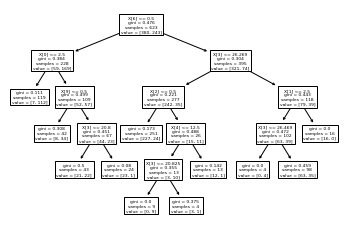

In [ ]:
from sklearn import tree
tree.plot_tree(model_dt)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_train['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked","Fare","Age"]
X_rf = pd.get_dummies(df_train[features])
X_rf_test = pd.get_dummies(df_test[features])

model_rf = RandomForestClassifier(n_estimators=1000, max_depth=8, criterion="gini", bootstrap='False')
model_rf.fit(X_rf,y)
predictions_rf = model_rf.predict(X_rf)
predictions_rf_test=model_rf.predict(X_rf_test)
fr_train_output=pd.DataFrame({'PassengerId':df_train.PassengerId, 'Prediction':predictions_rf, 'Actual':df_train.Survived})
fr_test_output=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Prediction':predictions_rf_test,'Actual':df_test.Survived})



In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(fr_train_output['Actual'],fr_train_output['Prediction'])
test_accuracy = accuracy_score(fr_test_output['Actual'],fr_test_output['Prediction'])
train_accuracy, test_accuracy

(0.9406099518459069, 0.7985074626865671)

In [ ]:
rf_feature_importance = dict(zip(model_rf.feature_names_in_ , model_rf.feature_importances_))
rf_feature_importance

{'Age': 0.15159166291210494,
 'Embarked_C': 0.013738678473673932,
 'Embarked_Q': 0.012464753323560278,
 'Embarked_S': 0.02545850787212514,
 'Fare': 0.20367376675179427,
 'Parch': 0.05417484511814611,
 'Pclass': 0.09506763472604188,
 'Sex_female': 0.19205115376986642,
 'Sex_male': 0.19394167978936316,
 'SibSp': 0.05783731726332382}

[[377   8]
 [ 34 204]]


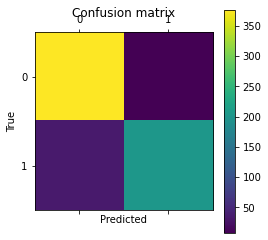

In [ ]:
cm=confusion_matrix(y_1, fr_train_output['Prediction'])
plot_confusion_matrix(cm)

# SGD

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked","Fare","Age"]
y=df_train['Survived']
X_SGD = pd.get_dummies(df_train[features])
X_SGD_test = pd.get_dummies(df_test[features])

# Always scale the input. The most convenient way is to use a pipeline.
model_SGD = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=100000, tol=1e-3))
model_SGD.fit(X_SGD, y)
predictions_SGD = model_SGD.predict(X_SGD)
predictions_SGD_test=model_SGD.predict(X_SGD_test)
SGD_train_output=pd.DataFrame({'PassengerId':df_train.PassengerId, 'Prediction':predictions_SGD, 'Actual':df_train.Survived})
SGD_test_output=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Prediction':predictions_SGD_test,'Actual':df_test.Survived})




In [ ]:
train_accuracy = accuracy_score(SGD_train_output['Actual'],SGD_train_output['Prediction'])
test_accuracy = accuracy_score(SGD_test_output['Actual'],SGD_test_output['Prediction'])
train_accuracy, test_accuracy


(0.7576243980738363, 0.7873134328358209)